In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Read the data csv file
df = pd.read_csv("30ktrain.csv")

In [ ]:
def preprocess(q):
  # make the question lowercase and remove whitespace from both ends if any
  q = str(q).lower().strip()

  # remove certain very common punctuations
  punc = [',','.','?']
  q = "".join(c for c in str(q) if c not in punc)

  # replace some special characters
  replace_char = {'₹':' rupee ', '$':' dollar ', '€':' euro ', '@':' at ', '%':' percent '}
  q = "".join(c if c not in replace_char.keys() else replace_char[c] for c in str(q))

  # replace contractions
  contractions = { 
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
  }
  q = " ".join([c if c not in contractions.keys() else contractions[c] for c in str(q).split()])

  return q

In [ ]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

In [ ]:
#EDA
fix = df.sample(5)

In [ ]:
fix

,id,qid1,qid2,question1,question2,is_duplicate,q1_strlen,q2_strlen,q1_#tokens,q2_#tokens,...,#total_tokens,token_share,cwc-min,cwc-max,csc-min,csc-max,ctc-min,ctc-max,1st_word_same,last_word_same
28159,364396,130594,494454,what is the color of na2zno2,what is the color of the miror,0,28,30,6,7,...,12,0.42,0.499750,0.499750,0.999750,0.999750,0.833194,0.833194,1,0
8097,240663,352524,352525,it is conventional to tip cab drivers in the c...,what are the main service sectors in the czech...,0,59,55,11,10,...,20,0.20,0.399920,0.333278,0.499875,0.399920,0.444395,0.363603,0,1
9349,345778,288012,473746,what are some of the greatest unsolved mysteri...,what is the greatest unsolved mystery in the u...,1,60,53,11,9,...,18,0.22,0.499875,0.499875,0.499875,0.333278,0.499938,0.399960,1,0
14768,228823,128038,337994,smart people: what books make you intelligent ...,what book must all smart people read,0,56,36,9,7,...,16,0.12,0.199960,0.166639,0.499750,0.333222,0.285673,0.222198,0,0
29170,4804,9485,9486,can you own a pet sloth in colorado,can you own a pet sloth in california,0,35,37,8,8,...,16,0.44,0.666445,0.666445,0.999800,0.999800,0.874891,0.874891,1,0


In [ ]:
#EDA
len(df)

30000

In [ ]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.4+ MB


In [ ]:
#EDA
df.is_duplicate.value_counts()

0    18759
1    11241
Name: is_duplicate, dtype: int64

<Axes: >

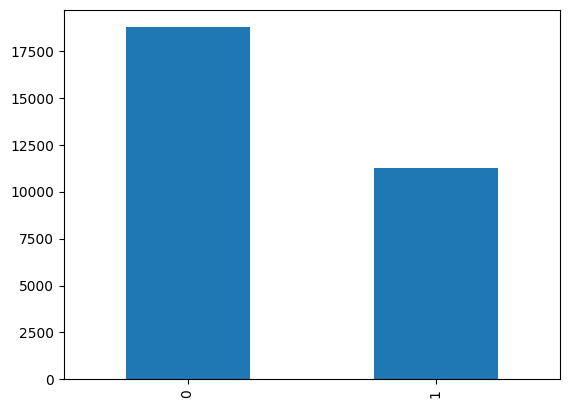

In [ ]:
#EDA
df.is_duplicate.value_counts().plot(kind='bar')

In [ ]:
#EDA
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
#EDA
df.duplicated().sum()

0

In [ ]:
#EDA
qid = pd.Series(list(df.qid1) + list(df.qid2))

In [ ]:
#EDA
len(qid)

60000

In [ ]:
#EDA
len(qid.value_counts()[qid.value_counts()==1])

52031

In [ ]:
#EDA
len(qid.value_counts()[qid.value_counts()>1])

3402

In [ ]:
qid.value_counts()[qid.value_counts()>1]

14376     11
18753     10
11588     10
2559      10
18531      9
          ..
265582     2
17437      2
40414      2
6281       2
6991       2
Length: 3402, dtype: int64

In [ ]:
#EDA
df.id.nunique()

30000

In [ ]:
#EDA
qid.value_counts()

14376     11
18753     10
11588     10
2559      10
18531      9
          ..
513435     1
79263      1
131119     1
54019      1
527540     1
Length: 55433, dtype: int64

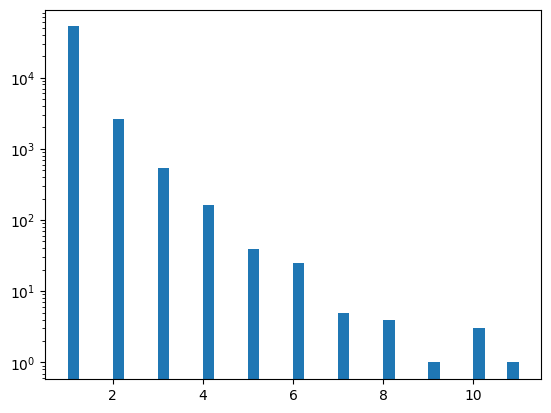

In [ ]:
#EDA
plt.hist(qid.value_counts().values, bins = 40)
plt.yscale('log')
plt.show()

##Feature Eng.


#Heuristic Features
1. q1_len: Length of question1
2. q2_len: Length of question2
3. q1_numwords: number of words in question1
4. q2_numwords: number of words in question2 
5. #common_words: total common words b/w two questions
6. #total_words: total of words in two questions
7. word_share: #common_words/#total_words

In [ ]:
df['q1_strlen'] = df['question1'].apply(lambda x: len(x))
df['q2_strlen'] = df['question2'].apply(lambda x: len(x))

In [ ]:
df['q1_#tokens'] = df['question1'].apply(lambda x: len(x.split()))
df['q2_#tokens'] = df['question2'].apply(lambda x: len(x.split()))

In [ ]:
def common_tokens(row):
  A = set(row['question1'].split())
  B = set(row['question2'].split())
  return len(A & B)

def common_tokens_array(q1,q2):
  A = set(q1.split())
  B = set(q2.split())
  return len(A & B)


In [ ]:
def total_tokens(row):
    A = set(row['question1'].split())
    B = set(row['question2'].split())
    return len(A) + len(B)

def total_tokens_array(q1,q2):
    A = set(q1.split())
    B = set(q2.split())
    return len(A) + len(B)

In [ ]:
df['#common_tokens'] = df.apply(common_tokens, axis=1)
df['#total_tokens'] = df.apply(total_tokens, axis =1)

In [ ]:
df['token_share'] = round(df['#common_tokens']/df['#total_tokens'],2)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_strlen,q2_strlen,q1_#tokens,q2_#tokens,#common_tokens,#total_tokens,token_share
0,322681,448536,448537,what do you think will be the box office prosp...,"what are the box office prospects for ""sausage...",1,78,53,15,9,8,22,0.36
1,27889,51765,51766,how do i prepare for gmat exam within 4 months,how can i prepare for the gmat exam in 15 months,0,46,48,10,11,7,21,0.33
2,77847,132852,132853,is it possible to be in the national guard whi...,how do the navy and national guard differ,0,65,41,13,8,3,20,0.15
3,310347,434447,434448,should we read the books first and then watch ...,should i read the books first or watch the show,1,104,47,21,10,7,20,0.35
4,187651,285958,285959,will my friends be able to see my whatsapp pic...,will i be able to call a person if he has dele...,0,76,70,15,15,8,28,0.29


#Advanced Features
1. cwc-min: total common words/min(words(ques1),words(ques2))
2. cwc-max: total common words/max(words(ques1),words(ques2))
3. csc-min: total common stopwords/min(stopwords(ques1),stopwords(ques2))
4. csc-max: total common stopwords/max(stopwords(ques1),stopwords(ques2))
5. ctc-min: total common tokens/min(tokens(ques1),tokens(ques2))
6. ctc-max: total common tokens/max(tokens(ques1),tokens(ques2))
7. last_word_equal
8. first_word_equal

TRIVIA: 
tokens - all words in question
words = tokens - stopwords(I,is,the,am,are, etc.)

In [ ]:
 
nltk.download('stopwords')

stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
SAFE_DIV = 0.001

In [ ]:
def cwc_min(row):
  A = set([x for x in row['question1'].split() if x not in stop_words])
  B = set([x for x in row['question2'].split() if x not in stop_words])
  return len(A & B)/(min(len(A),len(B))+SAFE_DIV)

def cwc_min_array(q1,q2):
  A = set([x for x in q1.split() if x not in stop_words])
  B = set([x for x in q2.split() if x not in stop_words])
  return len(A & B)/(min(len(A),len(B))+SAFE_DIV)

In [ ]:
def cwc_max(row):
  A = set([x for x in row['question1'].split() if x not in stop_words])
  B = set([x for x in row['question2'].split() if x not in stop_words])
  return len(A & B)/(max(len(A),len(B))+SAFE_DIV)

def cwc_max_array(q1,q2):
  A = set([x for x in q1.split() if x not in stop_words])
  B = set([x for x in q2.split() if x not in stop_words])
  return len(A & B)/(max(len(A),len(B))+SAFE_DIV)

In [ ]:
def csc_min(row):
  A = set([x for x in row['question1'].split() if x in stop_words])
  B = set([x for x in row['question2'].split() if x in stop_words])
  return len(A & B)/(min(len(A),len(B))+SAFE_DIV)

def csc_min_array(q1,q2):
  A = set([x for x in q1.split() if x in stop_words])
  B = set([x for x in q2.split() if x in stop_words])
  return len(A & B)/(min(len(A),len(B))+SAFE_DIV)


In [ ]:
def csc_max(row):
  A = set([x for x in row['question1'].split() if x in stop_words])
  B = set([x for x in row['question2'].split() if x in stop_words])
  return len(A & B)/(max(len(A),len(B))+SAFE_DIV)

def csc_max_array(q1,q2):
  A = set([x for x in q1.split() if x in stop_words])
  B = set([x for x in q2.split() if x in stop_words])
  return len(A & B)/(max(len(A),len(B))+SAFE_DIV)

In [ ]:
def ctc_min(row):
  A = set(row['question1'].split())
  B = set(row['question2'].split())
  return len(A & B)/(min(len(A),len(B))+SAFE_DIV)

def ctc_min_array(q1,q2):
  A = set(q1.split())
  B = set(q2.split())
  return len(A & B)/(min(len(A),len(B))+SAFE_DIV)

In [ ]:
def ctc_max(row):
  A = set(row['question1'].split())
  B = set(row['question2'].split())
  return len(A & B)/(max(len(A),len(B))+SAFE_DIV)

def ctc_max_array(q1,q2):
  A = set(q1.split())
  B = set(q2.split())
  return len(A & B)/(max(len(A),len(B))+SAFE_DIV)

In [ ]:
def first_word_same(row):
  return int(row['question1'].split()[0] == row['question2'].split()[0])

def first_word_same_array(q1,q2):
  return int(q1.split()[0] == q2.split()[0])  

def last_word_same(row):
  return int(row['question1'].split()[-1] == row['question2'].split()[-1]) 

def last_word_same_array(q1,q2):
  return int(q1.split()[-1] == q2.split()[-1])


In [ ]:
df['cwc-min'] = df.apply(cwc_min, axis=1)
df['cwc-max'] = df.apply(cwc_max, axis=1)
df['csc-min'] = df.apply(csc_min, axis=1)
df['csc-max'] = df.apply(csc_max, axis=1)
df['ctc-min'] = df.apply(ctc_min, axis=1)
df['ctc-max'] = df.apply(ctc_max, axis=1)
df['1st_word_same'] = df.apply(first_word_same, axis=1)
df['last_word_same'] = df.apply(last_word_same, axis=1)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_strlen,q2_strlen,q1_#tokens,q2_#tokens,...,#total_tokens,token_share,cwc-min,cwc-max,csc-min,csc-max,ctc-min,ctc-max,1st_word_same,last_word_same
0,322681,448536,448537,what do you think will be the box office prosp...,"what are the box office prospects for ""sausage...",1,78,53,15,9,...,22,0.36,0.999800,0.833194,0.749813,0.428510,0.888790,0.615337,1,0
1,27889,51765,51766,how do i prepare for gmat exam within 4 months,how can i prepare for the gmat exam in 15 months,0,46,48,10,11,...,21,0.33,0.799840,0.666556,0.749813,0.499917,0.699930,0.636306,1,1
2,77847,132852,132853,is it possible to be in the national guard whi...,how do the navy and national guard differ,0,65,41,13,8,...,20,0.15,0.499875,0.399920,0.249938,0.142837,0.374953,0.249979,0,0
3,310347,434447,434448,should we read the books first and then watch ...,should i read the books first or watch the show,1,104,47,21,10,...,20,0.35,0.799840,0.799840,0.749813,0.499917,0.777691,0.636306,1,0
4,187651,285958,285959,will my friends be able to see my whatsapp pic...,will i be able to call a person if he has dele...,0,76,70,15,15,...,28,0.29,0.499917,0.428510,0.833194,0.555494,0.615337,0.533298,1,1


## Analysis of features

minimum characters in a question1: 1
maximum characters in a question1: 335
average characters in a question1: 59


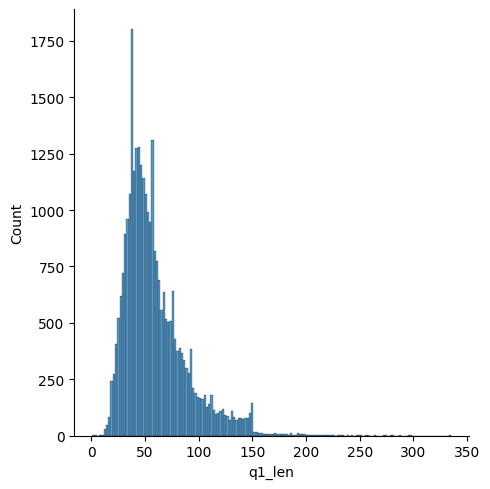

In [ ]:
sns.displot(df['q1_len'])
print("minimum characters in a question1:",df['q1_len'].min())
print("maximum characters in a question1:",df['q1_len'].max())
print("average characters in a question1:",int(df['q1_len'].mean()))

minimum characters in a question2: 4
maximum characters in a question2: 1169
average characters in a question2: 60


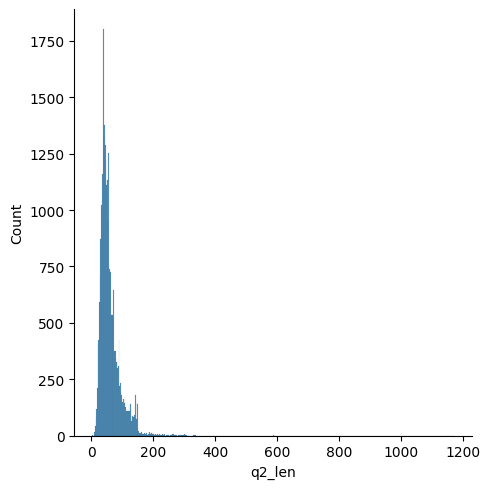

In [ ]:
sns.displot(df['q2_len'])
print("minimum characters in a question2:",df['q2_len'].min())
print("maximum characters in a question2:",df['q2_len'].max())
print("average characters in a question2:",int(df['q2_len'].mean()))

minimum words in q1: 1
maximum words in q1: 73
average words in q1: 10


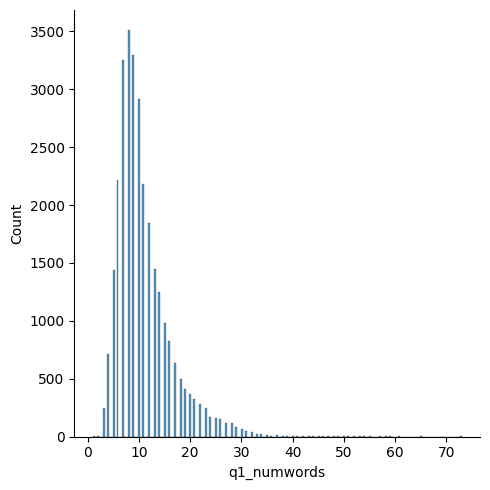

In [ ]:
sns.displot(df['q1_numwords'])
print("minimum words in q1:",df['q1_numwords'].min())
print("maximum words in q1:",df['q1_numwords'].max())
print("average words in q1:",int(df['q1_numwords'].mean()))

minimum words in q2: 1
maximum words in q2: 237
average words in q2: 11


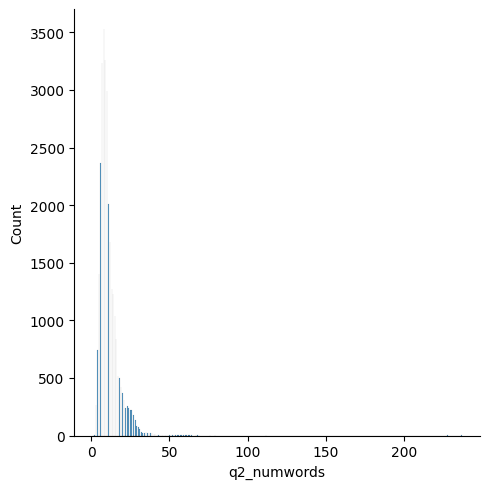

In [ ]:
sns.displot(df['q2_numwords'])
print("minimum words in q2:",df['q2_numwords'].min())
print("maximum words in q2:",df['q2_numwords'].max())
print("average words in q2:",int(df['q2_numwords'].mean()))

<ipython-input-25-4a24eb8c04a1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==0]['#common_words'], label = 'non-duplicate')
<ipython-input-25-4a24eb8c04a1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==1]['#common_words'], label = 'duplicate')


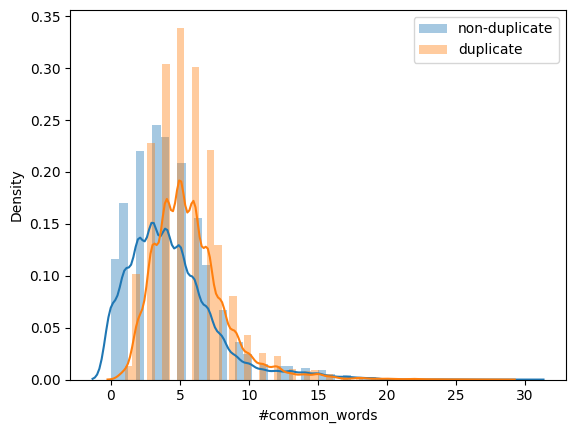

In [ ]:
# common words
sns.distplot(df[df['is_duplicate']==0]['#common_words'], label = 'non-duplicate')
sns.distplot(df[df['is_duplicate']==1]['#common_words'], label = 'duplicate')
plt.legend()
plt.show()

<ipython-input-27-562bbc641120>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==0]['#total_words'], label = 'non-duplicate')
<ipython-input-27-562bbc641120>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==1]['#total_words'], label = 'duplicate')


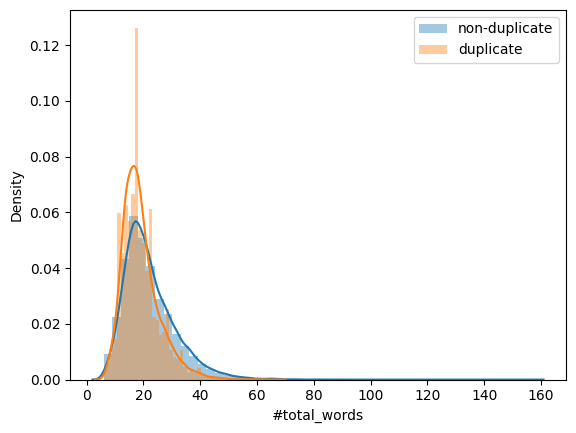

In [ ]:
# common words
sns.distplot(df[df['is_duplicate']==0]['#total_words'], label = 'non-duplicate')
sns.distplot(df[df['is_duplicate']==1]['#total_words'], label = 'duplicate')
plt.legend()
plt.show()

<ipython-input-28-b8f56ba1045d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==0]['word_share'], label = 'non-duplicate')
<ipython-input-28-b8f56ba1045d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==1]['word_share'], label = 'duplicate')


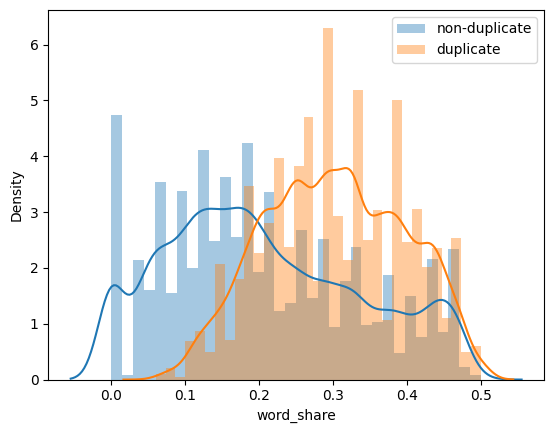

In [ ]:
# common words
sns.distplot(df[df['is_duplicate']==0]['word_share'], label = 'non-duplicate')
sns.distplot(df[df['is_duplicate']==1]['word_share'], label = 'duplicate')
plt.legend()
plt.show()

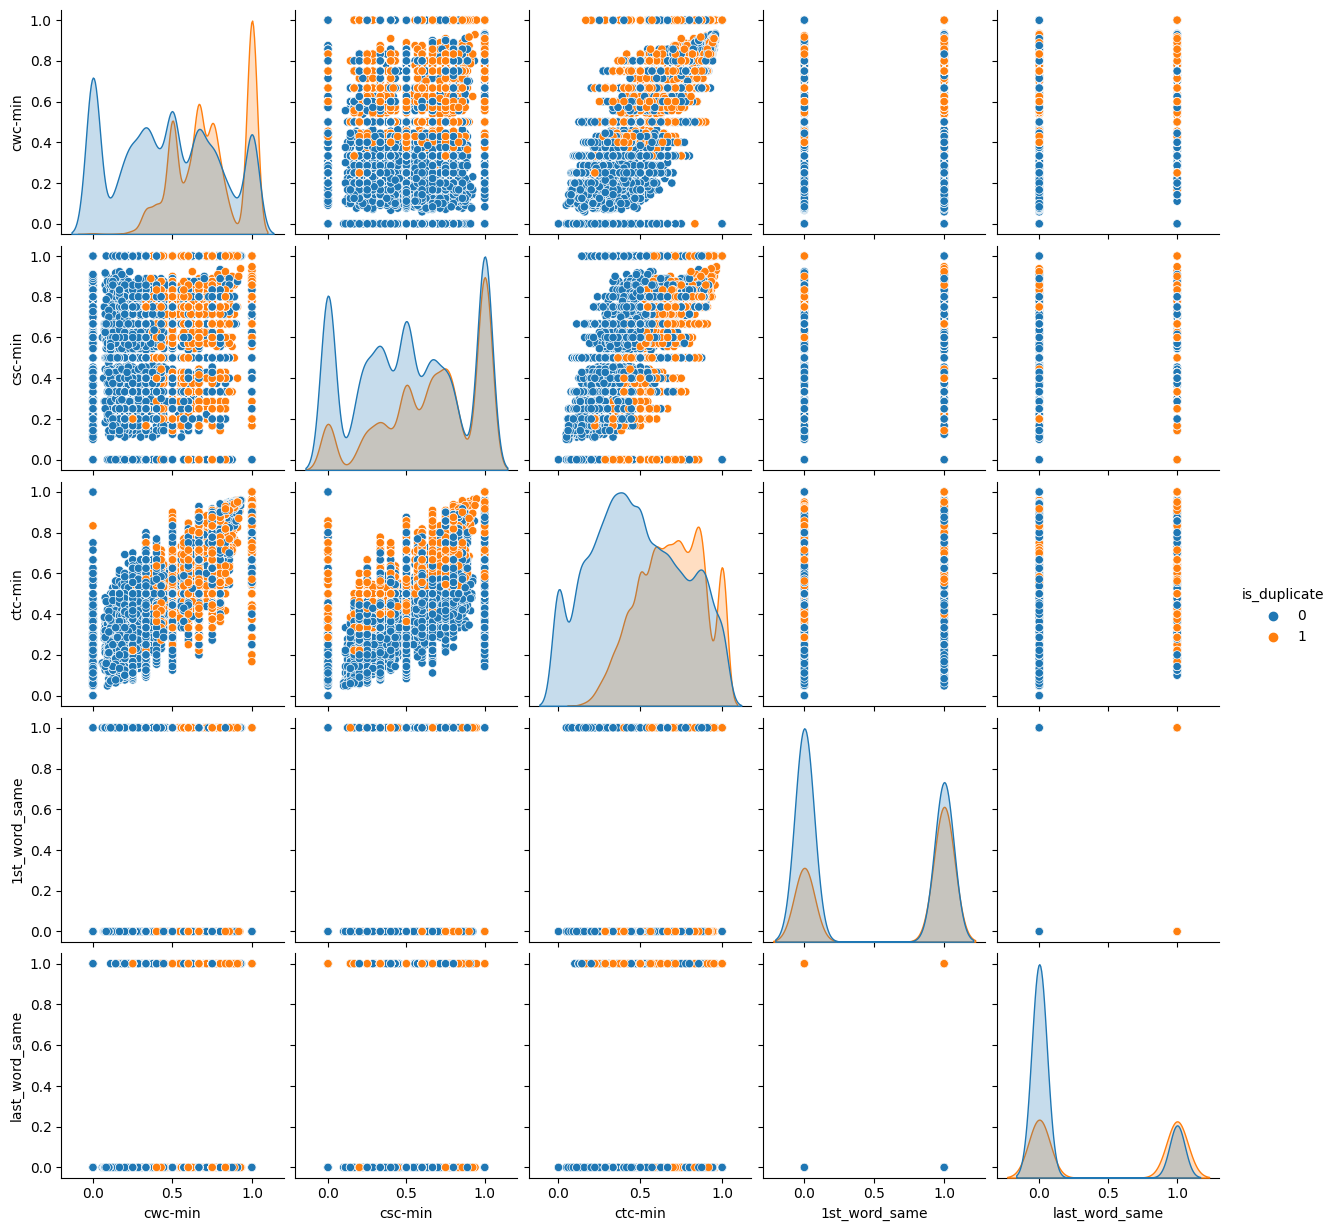

In [ ]:
sns.pairplot(df[['cwc-min','csc-min','ctc-min','is_duplicate','1st_word_same','last_word_same']], hue='is_duplicate')

In [ ]:
# dataframe with two columns - question1 & question2
quesdf_basic = df[['question1','question2']]

In [ ]:
#EDA
quesdf_basic.head()

,question1,question2
0,what do you think will be the box office prosp...,"what are the box office prospects for ""sausage..."
1,how do i prepare for gmat exam within 4 months,how can i prepare for the gmat exam in 15 months
2,is it possible to be in the national guard whi...,how do the navy and national guard differ
3,should we read the books first and then watch ...,should i read the books first or watch the show
4,will my friends be able to see my whatsapp pic...,will i be able to call a person if he has dele...


In [ ]:
final_df = df.drop(['id', 'qid1', 'qid2', 'question1', 'question2'], axis = 1)

In [ ]:
final_df.head()

,is_duplicate,q1_strlen,q2_strlen,q1_#tokens,q2_#tokens,#common_tokens,#total_tokens,token_share,cwc-min,cwc-max,csc-min,csc-max,ctc-min,ctc-max,1st_word_same,last_word_same
0,1,78,53,15,9,8,22,0.36,0.999800,0.833194,0.749813,0.428510,0.888790,0.615337,1,0
1,0,46,48,10,11,7,21,0.33,0.799840,0.666556,0.749813,0.499917,0.699930,0.636306,1,1
2,0,65,41,13,8,3,20,0.15,0.499875,0.399920,0.249938,0.142837,0.374953,0.249979,0,0
3,1,104,47,21,10,7,20,0.35,0.799840,0.799840,0.749813,0.499917,0.777691,0.636306,1,0
4,0,76,70,15,15,8,28,0.29,0.499917,0.428510,0.833194,0.555494,0.615337,0.533298,1,1


In [ ]:
#import count vectorizer for Bag of words technique
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#logic
# merge texts
questions = list(quesdf_basic['question1']) + list(quesdf_basic['question2'])

In [ ]:
# applying BOW to combined list containing both question1 and question2 and 
# then split the array from middle to get two arrays with first array as question1 
# BOW features and second array as question2 BOW features
cv = CountVectorizer(max_features = 3000)
ques1, ques2 = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
# make dataframe for both ques1 and ques2 features with index same as quesdf_basic
temp_df1 = pd.DataFrame(ques1,index=quesdf_basic.index)
temp_df2 = pd.DataFrame(ques2,index=quesdf_basic.index)


In [ ]:
#concatenate the two dataframes to form tempdf
tempdf = pd.concat([temp_df1,temp_df2],axis=1)


In [ ]:
final_df = pd.concat([final_df,tempdf], axis=1 )
final_df.shape


(30000, 6016)

In [ ]:
final_df.head()

,is_duplicate,q1_strlen,q2_strlen,q1_#tokens,q2_#tokens,#common_tokens,#total_tokens,token_share,cwc-min,cwc-max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,1,78,53,15,9,8,22,0.36,0.999800,0.833194,...,0,0,0,0,0,0,0,0,0,0
1,0,46,48,10,11,7,21,0.33,0.799840,0.666556,...,0,0,0,0,0,0,0,0,0,0
2,0,65,41,13,8,3,20,0.15,0.499875,0.399920,...,0,0,0,0,0,0,0,0,0,0
3,1,104,47,21,10,7,20,0.35,0.799840,0.799840,...,0,0,0,0,0,0,0,0,0,0
4,0,76,70,15,15,8,28,0.29,0.499917,0.428510,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = final_df.iloc[:,1:].values
X.shape

(30000, 6015)

In [ ]:
y = final_df.iloc[:,0].values
y.shape

(30000,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
start = time.time()
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
end = time.time()
training_time = end - start
print("Training time: {:.2f} seconds".format(training_time))
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

Training time: 108.84 seconds


0.789

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
start = time.time()
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
end = time.time()
training_time = end - start
print("Training time: {:.2f} seconds".format(training_time))
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)


In [ ]:
SAFE_DIV = 0.001
def input_array(q1,q2):
  input_query = []
  #heuristic features
  q1 = preprocess(q1)
  q2 = preprocess(q2)

  input_query.append(len(q1))
  input_query.append(len(q2))

  input_query.append(len(q1.split()))
  input_query.append(len(q2.split()))

  input_query.append(common_tokens_array(q1,q2))
  input_query.append(total_tokens_array(q1,q2))
  input_query.append(round(common_tokens_array(q1,q2)/total_tokens_array(q1,q2),2))

  # Advanced features

  input_query.append(cwc_min_array(q1,q2))
  input_query.append(cwc_max_array(q1,q2))
  input_query.append(csc_min_array(q1,q2))
  input_query.append(csc_max_array(q1,q2))
  input_query.append(ctc_min_array(q1,q2))
  input_query.append(ctc_max_array(q1,q2))
  input_query.append(first_word_same_array(q1,q2))
  input_query.append(last_word_same_array(q1,q2))

  # bow features
  q1_bow = cv.transform([q1]).toarray()
  q2_bow = cv.transform([q2]).toarray()

  return np.hstack((np.array(input_query).reshape(1,15),q1_bow,q2_bow))

In [ ]:
# q1 = 'can you own a pet sloth in colorado'
# q2 = 'can you own a pet sloth in california'

q1 = 'who is the best player in the world?'
q2 = 'who is the best football player ever?'

In [ ]:
input_array(q1,q2)

array([[24., 30.,  5., ...,  0.,  0.,  0.]])

In [ ]:
input_array(q1,q2).shape

(1, 6015)

In [ ]:
rf.predict(input_array(q1,q2))

array([1])

In [ ]:
import pickle
pickle.dump(rf,open("model.pkl","wb"))
pickle.dump(cv,open("cv.pkl","wb"))
pickle.dump(stop_words,open("stop_words.pkl","wb"))

In [ ]:
pickle.dump(stop_words,open("stop_words.pkl","wb"))

In [ ]:
from joblib import dump

dump(rf, 'model.joblib')
dump(cv, "cv.joblib")

['cv.joblib']